# Reference species (Dinophyceae): comparison of presence/absence of phagotrophy markers with trophic annotation (Schneider et al 2020)

#### Aim of this code:
Test the relevance of the choice of phagotrophy markers against a database of species' trophic annotation, built by Schneider et al 2020.

In [1]:
# Modules
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

### Read the file containing the trophic annotation: Schneider et al 2020 Supplementary Material

In [2]:
rep='/home/alexandra/Documents/M2Alexandra/Data_test/'
file=rep+'dinoflagellate_trophy.csv'
df=pd.read_csv(file,sep=';')

df.head(10)


,Unnamed: 0,ID,file_name,Supergroup_UniEuk,Taxogroup1_UniEuk,Taxogroup2_UniEuk,Genus,Species,Strain_name,Data_Source_Type,sp,trophy,typeMX
0,1,EP00401,EP00401_Gymnodinium_catenatum,Alveolata,Dinoflagellata,Dinophyceae,Gymnodinium,catenatum,GC744,transcriptome,Gymnodinium_catenatum,mixotrophic,CM
1,3,EP00404,EP00404_Azadinium_spinosum,Alveolata,Dinoflagellata,Dinophyceae,Azadinium,spinosum,3D9,transcriptome,Azadinium_spinosum,phototrophic,NaN
2,5,EP00406,EP00406_Dinophysis_acuminata,Alveolata,Dinoflagellata,Dinophyceae,Dinophysis,acuminata,DAEP01,transcriptome,Dinophysis_acuminata,mixotrophic,pSNCM
3,9,EP00413,EP00413_Alexandrium_margalefii,Alveolata,Dinoflagellata,Dinophyceae,Alexandrium,margalefii,CS-322,transcriptome,Alexandrium_margalefii,phototrophic,NaN
4,10,EP00414,EP00414_Alexandrium_minutum,Alveolata,Dinoflagellata,Dinophyceae,Alexandrium,minutum,CCMP113,transcriptome,Alexandrium_minutum,mixotrophic,CM
5,11,EP00415,EP00415_Alexandrium_ostenfeldii,Alveolata,Dinoflagellata,Dinophyceae,Alexandrium,ostenfeldii,AOSH2,transcriptome,Alexandrium_ostenfeldii,mixotrophic,CM
6,14,EP00419,EP00419_Tripos_fusus,Alveolata,Dinoflagellata,Dinophyceae,Tripos,fusus,PA161109,transcriptome,Tripos_fusus,mixotrophic,CM
7,15,EP00420,EP00420_Gonyaulax_spinifera,Alveolata,Dinoflagellata,Dinophyceae,Gonyaulax,spinifera,CCMP409,transcriptome,Gonyaulax_spinifera,phototrophic,NaN
8,16,EP00421,EP00421_Protoceratium_reticulatum,Alveolata,Dinoflagellata,Dinophyceae,Protoceratium,reticulatum,CCMP1889,transcriptome,Protoceratium_reticulatum,phototrophic,NaN
9,17,EP00424,EP00424_Heterocapsa_rotundata,Alveolata,Dinoflagellata,Dinophyceae,Heterocapsa,rotundata,SCCAP K-0483,transcriptome,Heterocapsa_rotundata,mixotrophic,CM


### Read the file containing, for each species, the phagotrophy markers found in their proteome

In [9]:
file_markers=rep+'markers_dino.tsv'
df_markers=pd.read_csv(file_markers,sep='\t')
# Columns: species; lines: markers
df_markers.index=df_markers.iloc[:,0]
df_markers=df_markers.drop(columns='Unnamed: 0')
df_markers.head(11)


,39_EP00444_Apocalathium_aciculiferum.tsv,80_MMETSP-METDB_00231-lessardia-elongata-spmc104-paired.tsv,32_EP00437_Effrenium_voratum.tsv,66_EP00974_Lingulodinium_polyedra.tsv,29_EP00429_Kryptoperidinium_foliaceum.tsv,100_MMETSP-METDB_00463-thoracosphaera-heimii-cccm670-paired.tsv,4_EP00396_MALV-II-16_sp_LP-1.filter.tsv,27_EP00427_Karlodinium_veneficum.tsv,43_EP00449_Zooxanthella_nutricula.tsv,41_EP00446_Apocalathium_sp_SHHI-4.tsv,...,40_EP00445_Apocalathium_hangoei.tsv,17_EP00413_Alexandrium_margalefii.tsv,49_EP00811_Abedinium_folium.tsv,30_EP00434_Breviolum_minutum.tsv,21_EP00418_Pyrodinium_bahamense.tsv,2_EP00392_Amoebophrya_sp_AT5.2.filter.tsv,14_EP00408_Alexandrium_pacificum.tsv,94_MMETSP-METDB_00435-symbiodinium-sp-ccmp2430-paired.tsv,88_MMETSP-METDB_00348-polarella-glacialis-ccmp2088-paired.tsv,74_MMETSP-METDB_00013-amphidinium-massartii-cs259-paired.tsv
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Cat,True,True,True,False,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Cdc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chl,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Pho,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rab,True,True,True,False,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Rac,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rap,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rho,False,False,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,True,True,False,True
Snare,True,False,True,False,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
# Modification : keep only the species of which the transcriptome/genome was found in EukProt/METdb databases

species_list=os.listdir('/home/alexandra/Documents/M2Alexandra/Data_test/Ref_seq/Ref_seq_fasta')
df_markers_mod=pd.DataFrame(index=df_markers.index) 


for column in range(np.shape(df_markers)[1]):
    species=df_markers.iloc[:,column].name
    if species[:-4]+'_seq.fasta' in species_list:
        df_markers_mod[species[:-4]]=df_markers[species]


df_markers_mod.head(11)


,39_EP00444_Apocalathium_aciculiferum,80_MMETSP-METDB_00231-lessardia-elongata-spmc104-paired,32_EP00437_Effrenium_voratum,29_EP00429_Kryptoperidinium_foliaceum,27_EP00427_Karlodinium_veneficum,43_EP00449_Zooxanthella_nutricula,41_EP00446_Apocalathium_sp_SHHI-4,11_EP00404_Azadinium_spinosum,97_MMETSP-METDB_00438-symbiodinium-sp-c15-paired,48_EP00747_Dinoflagellata_sp_TGD,...,12_EP00405_Crypthecodinium_cohnii,91_MMETSP-METDB_00360-prorocentrum-minimum-ccmp2233-paired,40_EP00445_Apocalathium_hangoei,17_EP00413_Alexandrium_margalefii,49_EP00811_Abedinium_folium,21_EP00418_Pyrodinium_bahamense,14_EP00408_Alexandrium_pacificum,94_MMETSP-METDB_00435-symbiodinium-sp-ccmp2430-paired,88_MMETSP-METDB_00348-polarella-glacialis-ccmp2088-paired,74_MMETSP-METDB_00013-amphidinium-massartii-cs259-paired
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Cat,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Cdc,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Chl,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Pho,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rab,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Rac,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Rap,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Rho,False,False,True,True,True,True,False,False,True,True,...,True,True,False,True,True,True,True,True,False,True
Snare,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### Find the number of occurrences of each marker in the reference species set

In [27]:
cat=df_markers_mod.loc[df_markers_mod.index=='Cat'] # extract a row
cdc=df_markers_mod.loc[df_markers_mod.index=='Cdc']
chl=df_markers_mod.loc[df_markers_mod.index=='Chl']
pho=df_markers_mod.loc[df_markers_mod.index=='Pho']
rab=df_markers_mod.loc[df_markers_mod.index=='Rab']
rac=df_markers_mod.loc[df_markers_mod.index=='Rac']
rap=df_markers_mod.loc[df_markers_mod.index=='Rap']
rho=df_markers_mod.loc[df_markers_mod.index=='Rho']
snare=df_markers_mod.loc[df_markers_mod.index=='Snare']
wash=df_markers_mod.loc[df_markers_mod.index=='Wash']
wasp=df_markers_mod.loc[df_markers_mod.index=='Wasp']

# Obtain the number of occurrences of these markers in the ensemble of species
# Store them in a dictionary
heights={'Cat':len(np.where(cat==True)[1]),'Cdc':len(np.where(cdc==True)[1]),'Chl':len(np.where(chl==True)[1]),'Pho':len(np.where(pho==True)[1]),'Rab':len(np.where(rab==True)[1]),'Rac':len(np.where(rac==True)[1]),'Rap':len(np.where(rap==True)[1]),'Rho':len(np.where(rho==True)[1]),'Snare':len(np.where(snare==True)[1]),'Wash':len(np.where(wash==True)[1]),'Wasp':len(np.where(wasp==True)[1])}
print(heights)
tell=list(heights)
tell
list_heights=[heights[item] for item in tell]

{'Cat': 64, 'Cdc': 1, 'Chl': 67, 'Pho': 0, 'Rab': 66, 'Rac': 0, 'Rap': 4, 'Rho': 43, 'Snare': 65, 'Wash': 48, 'Wasp': 15}


### Quick visualization of the number of occurrences of the markers: barplot

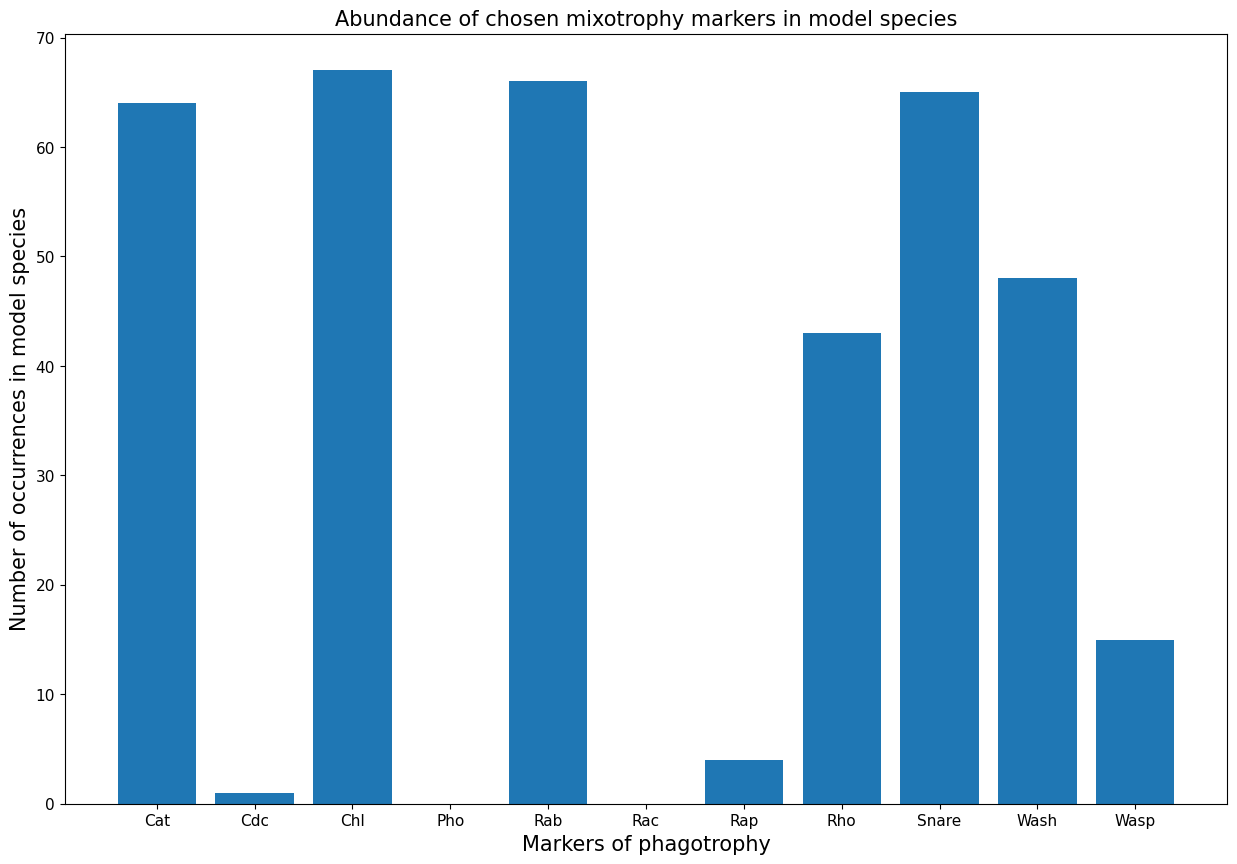

In [29]:
x=np.arange(11)

fig,ax=plt.subplots(figsize=(15,10))
ax.set_title("Abundance of chosen mixotrophy markers in model species",fontsize=15)
ax.bar(x,list_heights)
ax.set_xticks(x,tell)
ax.set_ylabel("Number of occurrences in model species",fontsize=15)
ax.tick_params(labelsize=11)
ax.set_xlabel("Markers of phagotrophy",fontsize=15)
plt.show()

#### Visualization in the form of a ratio of occurrences

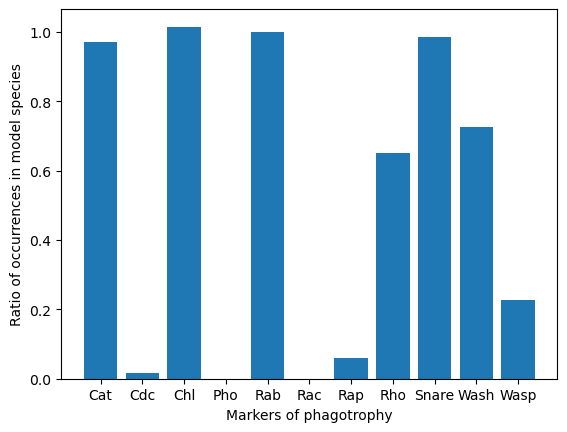

In [30]:
matrice=df_markers_mod
heights_modif=[item/(matrice.shape[1]-1) for item in list_heights] # divide by the total nb of species in the reference set
fig,ax=plt.subplots()
ax.bar(x,heights_modif)
ax.set_xticks(x,tell)
ax.set_ylabel("Ratio of occurrences in model species")
ax.set_xlabel("Markers of phagotrophy")
plt.show()

## We would like to visualize occurrences of markers according to the trophic type

In [33]:
### Idea = stacked barplots, 1 color per trophic type (considering additionally unannotated species)
### Cross data on trophic types with occurrences of markers

mixo=df.loc[df['trophy']=='mixotrophic']['file_name'] # extract names of species which are mixotrophs
photo=df.loc[df['trophy']=='phototrophic']['file_name']
phago=df.loc[df['trophy']=='phagotrophic']['file_name']
len(mixo)+len(photo)+len(phago)


52

In [57]:
### Function to run on all markers
matrice=df_markers_mod

def corr_marker_trophy(marker):
    """input: str which corresponds to a marker.
    Output: dictionary containing the nb of occurrences of this marker in mixo, phago, phototrophic and unassigned species"""
    count_mixo,count_phago,count_photo,count_na=0,0,0,0
    count=0 # check if we get the same nb as in heights
    index=np.where(matrice.index==marker)[0][0] # which line corresponds to this marker
    
    for column in range(1,matrice.shape[1]): # loop on columns = on species
    
        a=(matrice.iloc[:,column].name) # this extracts the species' name
        if matrice[a][index]==True:
            count+=1 # marker present
            if len(np.where(mixo[:]==a[3:])[0])>0:
                #print(np.where(mixo[:]==a[3:-4]))
                #print("Mixo and {}".format(marker),a)
                count_mixo+=1
            elif len(np.where(photo[:]==a[3:])[0])>0:
                #print("Photo and {}".format(marker),a)
                count_photo+=1
            elif len(np.where(phago[:]==a[3:])[0])>0:
                #print("Phago and {}".format(marker),a)
                count_phago+=1
            else:
                # it is unassigned
                count_na+=1
    trophy_markers={'Mixo':count_mixo,'Phago':count_phago,'Photo':count_photo,'Na':count_na}
    return(trophy_markers)

corr_marker_trophy('Chl')
#corr_marker_trophy('Wasp')

{'Mixo': 22, 'Phago': 3, 'Photo': 9, 'Na': 32}

In [58]:
# Representation of each trophic type for each marker
percentage_dict={}

for marker in tell:
    liste=[corr_marker_trophy(marker)[element] for element in list(corr_marker_trophy(marker))]
    summing=np.sum(liste)
    mixo_nb=corr_marker_trophy(marker)['Mixo']
    if summing==0:
        percentage=0
    else:
        percentage=(mixo_nb/summing)*100
    percentage_dict[marker]=percentage
percentage_dict

{'Cat': 31.746031746031743,
 'Cdc': 100.0,
 'Chl': 33.33333333333333,
 'Pho': 0,
 'Rab': 32.30769230769231,
 'Rac': 0,
 'Rap': 50.0,
 'Rho': 37.2093023255814,
 'Snare': 34.375,
 'Wash': 34.04255319148936,
 'Wasp': 35.714285714285715}

{'Mixotrophic': [20, 1, 22, 0, 21, 0, 2, 16, 22, 16, 5], 'Phagotrophic': [3, 0, 3, 0, 3, 0, 0, 2, 3, 2, 0], 'Phototrophic': [9, 0, 9, 0, 9, 0, 1, 5, 8, 6, 0], 'Unassigned': [31, 0, 32, 0, 32, 0, 1, 20, 31, 23, 9]}


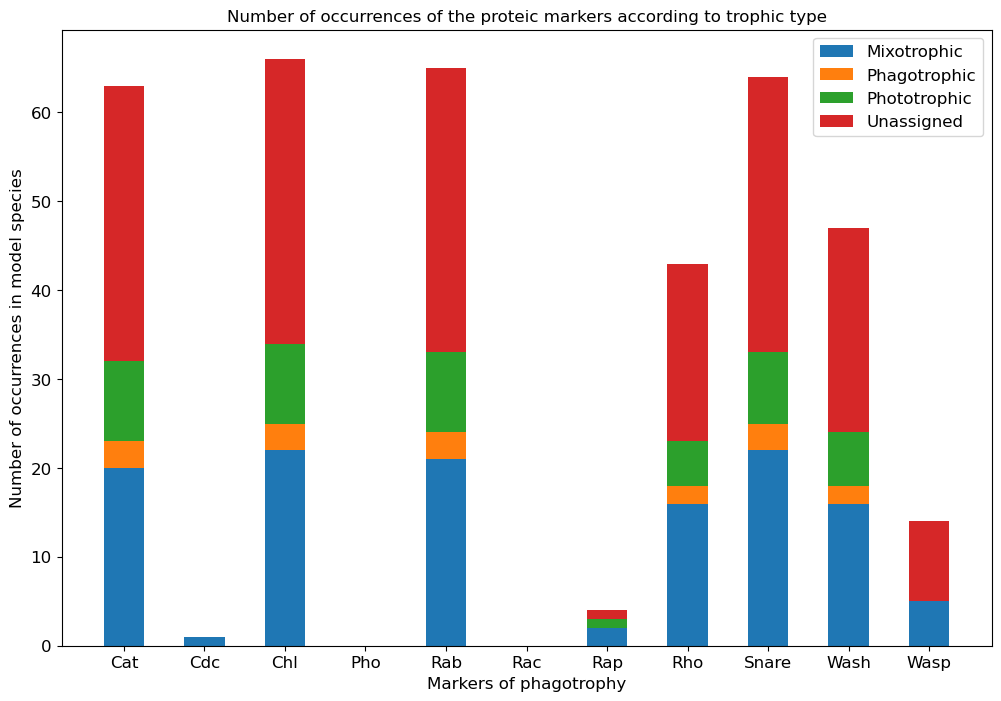

In [59]:
#
tell # Stores the markers' names
counts={"Mixotrophic":[corr_marker_trophy(element)['Mixo'] for element in tell],
"Phagotrophic":[corr_marker_trophy(element)['Phago'] for element in tell],
"Phototrophic":[corr_marker_trophy(element)['Photo'] for element in tell],
"Unassigned":[corr_marker_trophy(element)['Na'] for element in tell]
       }

print(counts)
width=0.5
fig,ax=plt.subplots(figsize=(12,8))

bottom=np.zeros(11)

for boolean, count in counts.items():
    p = ax.bar(tell, count, width, label=boolean, bottom=bottom)
    bottom += count

ax.legend(loc="upper right",fontsize=12)
ax.set_ylabel("Number of occurrences in model species",fontsize=12)
ax.set_xlabel("Markers of phagotrophy",fontsize=12)
ax.tick_params(labelsize=12)
ax.set_title('Number of occurrences of the proteic markers according to trophic type',fontsize=12)
plt.show()